## Итоговая работа. Пономарев Александр

*Подготовим необходимые для работы библиотеки*

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import pylab 

import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

*Загрузим данные, необходимые для работы*

In [54]:
df = pd.read_csv('HR.csv')
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


*Как мы видим, в массиве данных встречаются и категориальные признаки. Для их более детального анализа, нужно провести кодирование категориальных данных sales и salary*

In [55]:
salary_vals = df['salary'].unique()
sales_vals = df['sales'].unique()
print(f'Уникальные значения salary: {salary_vals}')
print(f'Уникальные значения sales: {sales_vals}')

Уникальные значения salary: ['low' 'medium' 'high']
Уникальные значения sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Введем следующие правила кодирования для salary:

'low' - 1, 'medium' - 2, 'high' - 3

Введем следующие правила кодирования для sales:

'sales' - 1, 'accounting' - 2, 'hr' - 3, 'technical' - 4, 'support' - 5, 'management' - 6, 'IT' - 7,
'product_mng' - 8, 'marketing' - 9, 'RandD' - 10

In [56]:
salarary_dict = {'low': 1, 'medium': 2, 'high': 3}
sales_dict = {
    'sales': 1,
    'accounting': 2,
    'hr': 3,
    'technical': 4,
    'support': 5,
    'management': 6,
    'IT': 7,
    'product_mng': 8,
    'marketing': 9,
    'RandD': 10
}

In [57]:
df['salary_encoded'] = df['salary'].apply(lambda x: salarary_dict[x])
df['sales_encoded'] = df['sales'].apply(lambda x: sales_dict[x])
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_encoded,sales_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1
5,0.41,0.50,2,153,3,0,1,0,sales,low,1,1
6,0.10,0.77,6,247,4,0,1,0,sales,low,1,1
7,0.92,0.85,5,259,5,0,1,0,sales,low,1,1
8,0.89,1.00,5,224,5,0,1,0,sales,low,1,1
9,0.42,0.53,2,142,3,0,1,0,sales,low,1,1


In [58]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,sales_encoded
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706,4.339823
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,2.820837
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,7.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000,10.000000


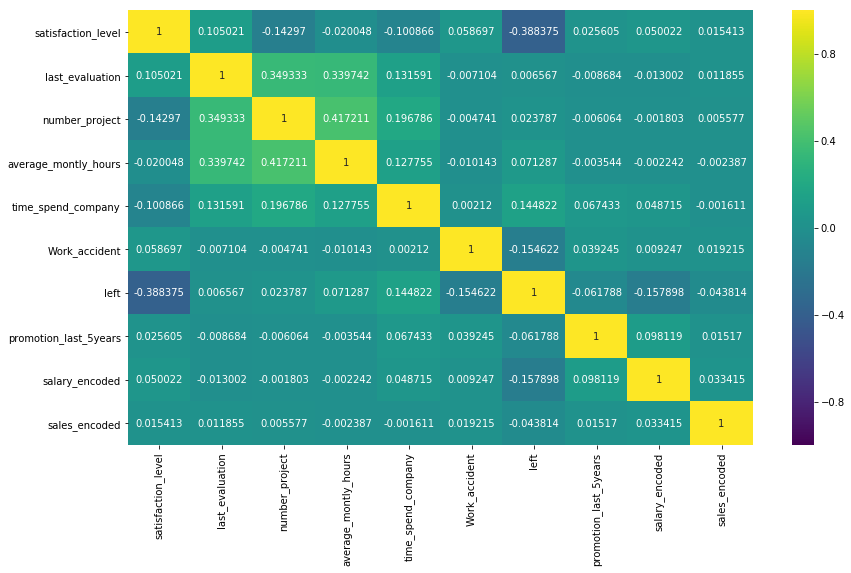

In [59]:
corr_matrix = round(df.corr(), 6)
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt="g", cmap='viridis', robust=True, vmax=1, vmin=-1)
plt.show()

Явно коррелирующих параметров нет. Однако можно отметить "повышенную" корреляцию между такими параметрами, как:

* satisfaction_level - left (обратная связь)
* last_evaluation - number_project (прямая связь)
* avarage_number_hours - number_project (прямая связь)
* last_evaluation - average_montly_hours (прямая связь)

*Визуализируем связь между этими парами:*

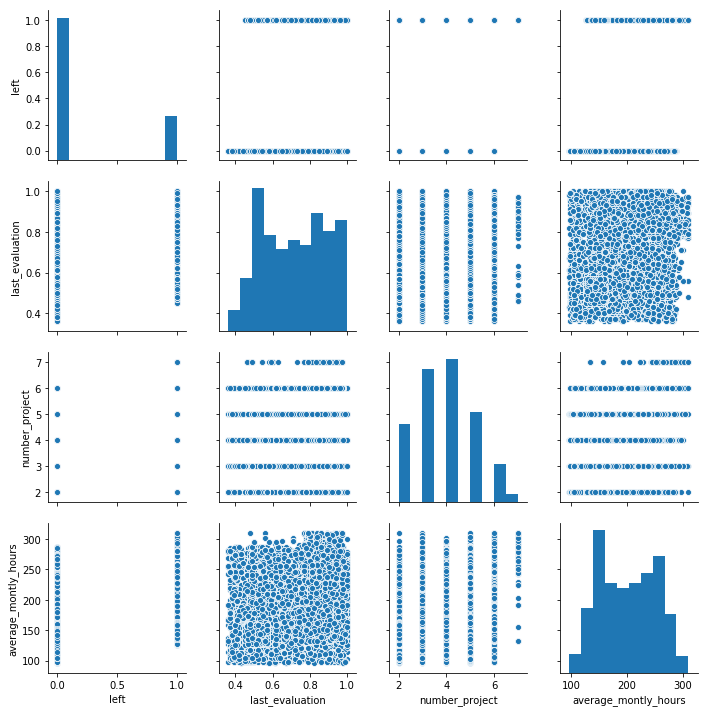

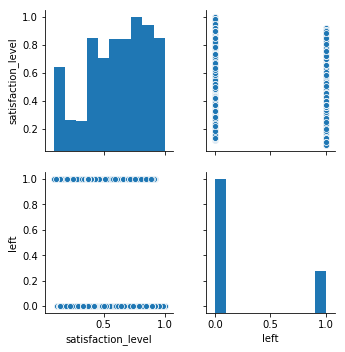

In [62]:
sns.pairplot(df[ ['left', 'last_evaluation', 'number_project', 'average_montly_hours'] ])
sns.pairplot(df[ ['satisfaction_level', 'left'] ])

Согласно заданию:

*5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.*

Судя по всему речь идет о t-критерии Стьюдента. Данный критерий не характеризует взаимосвязь между параметрами, а предназначен в основном для проверки равенства средних двух выборок.
Исходя из порядков в представленных данных, более-менее пригодными для теста являются пары:

1. satisfaction_level (min: 0.090000, max: 1.000000) - last_evaluation (min: 0.360000, max: 1.000000)
2. number_project - time_spend_company 
3. left - Work_accident
4. Work_accident - promotion_last_5years
5. promotion_last_5years - left

In [41]:
ttest = stats.ttest_ind(df['satisfaction_level'], df['last_evaluation'])
print(f'Ttest равенства средних для satisfaction_level, last_evaluation. Уровнь значимости: {ttest.pvalue}')
print('Гипотезу ол равенстве средних принять нельзя, так как уровень значимости крайне мал')

Ttest равенства средних для satisfaction_level, last_evaluation. Уровнь значимости: 0.0


In [63]:
ttest = stats.ttest_ind(df['number_project'], df['time_spend_company'])
print(f'Ttest равенства средних для number_project, time_spend_company. Уровнь значимости: {ttest.pvalue}')
print('Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал')

Ttest равенства средних для number_project, time_spend_company. Уровнь значимости: 1.7938911515379e-84
Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал


In [64]:
ttest = stats.ttest_ind(df['left'], df['Work_accident'])
print(f'Ttest равенства средних для left, Work_accident. Уровнь значимости: {ttest.pvalue}')
print('Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал')

Ttest равенства средних для left, Work_accident. Уровнь значимости: 9.625063899986344e-95
Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал


In [65]:
ttest = stats.ttest_ind(df['Work_accident'], df['promotion_last_5years'])
print(f'Ttest равенства средних для Work_accident, promotion_last_5years. Уровнь значимости: {ttest.pvalue}')
print('Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал')

Ttest равенства средних для Work_accident, promotion_last_5years. Уровнь значимости: 0.0
Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал


In [66]:
ttest = stats.ttest_ind(df['promotion_last_5years'], df['left'])
print(f'Ttest равенства средних для promotion_last_5years, left. Уровнь значимости: {ttest.pvalue}')
print('Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал')

Ttest равенства средних для promotion_last_5years, left. Уровнь значимости: 0.0
Гипотезу о равенстве средних принять нельзя, так как уровень значимости крайне мал


*Рассчитаем, сколько сотрудников работает в каждом из департаментов*

In [82]:
res = df.groupby('sales').size().reset_index(name='counts')
res

,sales,counts
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


*Далее, покажем распределение сотрудников по зарплатам*

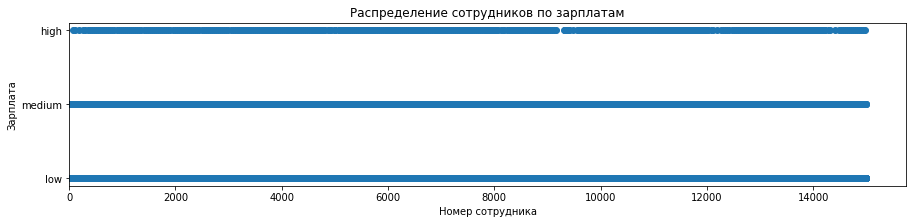

In [94]:
fig, ax = plt.subplots(figsize=(15, 3))

x = np.linspace(1, df.shape[0], df.shape[0])
ax.plot(x, df['salary'], linestyle="",marker="o")
plt.title('Распределение сотрудников по зарплатам')
plt.ylabel('Зарплата')
plt.xlabel('Номер сотрудника')
plt.xlim(left=1)
plt.show()

In [97]:
res = df.groupby('salary').size().reset_index(name='counts')
print('Ниже представлено кол-во сотрудников для каждого уровня зарплаты')
res

Ниже представлено кол-во сотрудников для каждого уровня зарплаты


,salary,counts
0,high,1237
1,low,7316
2,medium,6446


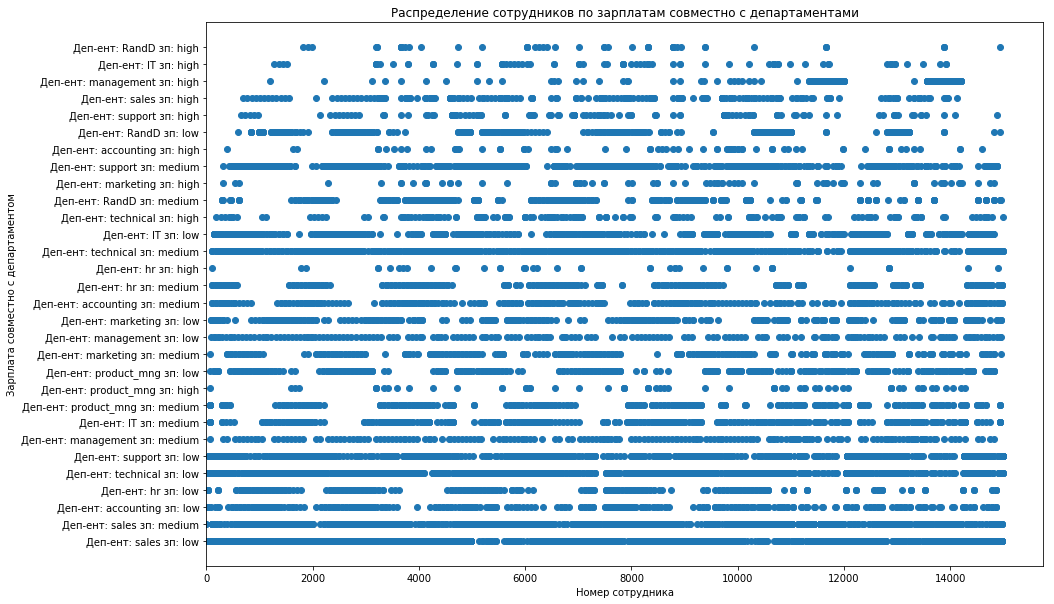

In [107]:
df['sales and salary'] = df[['sales', 'salary']]\
    .apply(lambda x: 'Деп-ент: ' + x['sales'] + ' зп: ' + x['salary'], axis=1)
fig, ax = plt.subplots(figsize=(15, 10))

x = np.linspace(1, df.shape[0], df.shape[0])
ax.plot(x, df['sales and salary'], linestyle="",marker="o")
plt.title('Распределение сотрудников по зарплатам совместно с департаментами')
plt.ylabel('Зарплата совместно с департаментом')
plt.xlabel('Номер сотрудника')
plt.xlim(left=1)
plt.show()

In [272]:
res = df.groupby(['salary', 'sales']).size().reset_index(name='counts').sort_values(['sales', 'salary'])
print('Ниже представлено кол-во сотрудников для каждого уровня зарплаты совместно с департаментом')
res

Ниже представлено кол-во сотрудников для каждого уровня зарплаты совместно с департаментом


,salary,sales,counts
0,high,IT,83
10,low,IT,609
20,medium,IT,535
1,high,RandD,51
11,low,RandD,364
21,medium,RandD,372
2,high,accounting,74
12,low,accounting,358
22,medium,accounting,335
3,high,hr,45


*Далее, посчитаем, сколько сотрудников покинуло компанию*

In [112]:
res = df['left'].sum()
print(f'Компанию покинул {res} сотрудник')

Компанию покинул 3571 сотрудник


*Рассмотрим следующую гипотезу:*

$H_{0}:$ У сотрудников, ушедших из компании, средний уровень удовлетворенности работы равен 0.44

Для этого применим односторонний t тест 

In [237]:
employees_left = df[ df['left'] == 1]

ttest = stats.ttest_1samp(employees_left['satisfaction_level'], 0.44)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.9822967622087426


Так как мы получили очень высокий уровень значимости p_value = 0.9822967622087426, эту гипотезу можно принять

Рассмотрим еще одну гипотезу:

$H_{0}:$ У сотрудников, ушедших из компании, было происшествие на рабочем месте, т.е. среднее по параметру Work_accident = 0.8

Для этого применим односторонний t тест 

In [150]:
employees_left = df[ df['left'] == 1]

ttest = stats.ttest_1samp(employees_left['Work_accident'], 0.8)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости Ttest_1sampResult(statistic=-211.7973640368532, pvalue=0.0)


Так как полученный уровень значимости крайне мал, эту гипотезу не следует принимать

Рассмотрим еще одну гипотезу:

$H_{0}:$ У сотрудников, ушедших из компании, не было повышения за последние 5 лет, т.е. среднее по параметру promotion_last_5years = 0.006

Для этого применим односторонний t тест

In [162]:
employees_left = df[ df['left'] == 1]

ttest = stats.ttest_1samp(employees_left['promotion_last_5years'], 0.006)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.5768991761819316


Так как мы получили очень высокий уровень значимости p_value = 0.5768991761819316, эту гипотезу можно принять

Рассмотрим еще одну гипотезу:

$H_{0}:$ У сотрудников, ушедших из компании, было повышенное кол-во часов работы в месяц, т.е. average_montly_hours = 208

Для этого применим односторонний t тест

In [230]:
employees_left = df[ df['left'] == 1]

ttest = stats.ttest_1samp(employees_left['average_montly_hours'], 208)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.5706972357918088


Так как мы получили очень высокий уровень значимости p_value = 0.5706972357918088, эту гипотезу можно принять

Рассмотрим еще одну гипотезу:

$H_0:$ У сотрудников, ушедших из компании, была низкая оценка эффктивности, т.е. средняя last_evaluation = 0.1

Для этого применим односторонний t тест

In [231]:
employees_left = df[ df['left'] == 1]

ttest = stats.ttest_1samp(employees_left['last_evaluation'], 0.1)
print(f'Уровень значимости {ttest.pvalue}, соответственно данную гипотезу рассмтаривать не стоит')

Уровень значимости 0.0


Итого, мы проверили следующие гипотезы
1. У сотрудников, ушедших из компании, средний уровень удовлетворенности работы равен 0.44, ее мы приняли
2. У сотрудников, ушедших из компании, было происшествие на рабочем месте, т.е. среднее по параметру Work_accident = 0.8 - отвергнули
3. У сотрудников, ушедших из компании, не было повышения за последние 5 лет, т.е. среднее по параметру promotion_last_5years = 0.006 - приняли
4. У сотрудников, ушедших из компании, была низкая оценка эффктивности, т.е. средняя last_evaluation = 0.1 - отвергнули
5. У сотрудников, ушедших из компании, было повышенное кол-во часов работы в месяц, т.е. average_montly_hours = 208 - приняли

Другими словами, важными для нас параметрами оказались:
satisfaction_level, promotion_last_5years, average_montly_hours

Далее сформируем возможные интервалы для данных параметров, для которых вероятнее всего сотрудник покинет компанию

In [268]:
# Гипотетические значения средних, на основе принятых гипотез
satisfaction_mean_estimation = 0.44
promotion_last_5years_mean_estimation = 0.006
average_montly_hours_mean_estimation = 208

low_satis_left = employees_left[(employees_left['satisfaction_level'] <= satisfaction_mean_estimation)]
alot_of_hours_left = employees_left[(employees_left['average_montly_hours'] >= average_montly_hours_mean_estimation)]
no_promotion_left = employees_left[employees_left['promotion_last_5years'] == 0]
low_salary_left = employees_left[employees_left['salary'] == 'low']

total_left = employees_left.shape[0]

print(f"В итоге, процент сотрудников покинувшие компанию изза разных причин:")
print(f"1. Уровень удовлетворенности (<= 0.44): {round(low_satis_left.shape[0] / total_left * 100, 2)}%")
print(f"2. Повышенное кол-во часов работы в месяц (>= 208): {round(alot_of_hours_left.shape[0] / total_left * 100, 2)}%")
print(f"3. Не было повышений в теч 5 месяцев: {round(no_promotion_left.shape[0] / total_left * 100, 2)}%")
print(f"4. Низкий уровень зп: {round(low_salary_left.shape[0] / total_left * 100, 2)}%")

В итоге, процент сотрудников покинувшие компанию изза разных причин:
1. Уровень удовлетворенности (<= 0.44): 64.58%
2. Повышенное кол-во часов работы в месяц (>= 208): 53.29%
3. Не было повышений в теч 5 месяцев: 99.47%
4. Низкий уровень зп: 60.82%


В итоге, можно сделать вывод, что, в основном, сотрудники покидают компанию при отсутствии персонального роста и повышений.

Так же немаловажным являются: низкий уровень заработной платы и низкий уровень удовлетворенности рабочим местом.